In [1]:
# ## This script reads the dat files generated by the SPECFEM2D code and plots the model
# import os
# import pathlib
# import numpy as np
# import matplotlib.pyplot as plt

# custom_type = 'f'

# model_bins = sorted(pathlib.Path('./specfem2d_workdir/DATA/').glob('proc*_vp_vs.dat'))

# x_list, z_list, rho_list, vp_list, vs_list = [], [], [], [], []
# for bin in model_bins:
#     model_array = np.loadtxt(bin)   # x, y, rho, vp, vs
#     x_list.append(model_array[:,0])
#     z_list.append(model_array[:,1])
#     rho_list.append(model_array[:,2])
#     vp_list.append(model_array[:,3])
#     vs_list.append(model_array[:,4])


# x = np.hstack(x_list)
# z = np.hstack(z_list)
# rho = np.hstack(rho_list)
# vp = np.hstack(vp_list)
# vs = np.hstack(vs_list)


In [2]:
# def grid(x, y, z, resX=100, resY=100):
#     """
#     Converts 3 column data to matplotlib grid
#     """
#     #griddata deprecated since matplotlib 3.1: from matplotlib.mlab import griddata
#     from scipy.interpolate import griddata

#     xi = np.linspace(min(x), max(x), resX)
#     yi = np.linspace(min(y), max(y), resY)

#     # mlab version
#     #Z = griddata(x, y, z, xi, yi, interp='linear')
#     # scipy version
#     Z = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

#     X, Y = np.meshgrid(xi, yi)
#     return X, Y, Z

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def grid(x, y, z, resX=100, resY=100):
    """
    Converts 3 column data to matplotlib grid
    """
    #griddata deprecated since matplotlib 3.1: from matplotlib.mlab import griddata
    from scipy.interpolate import griddata

    xi = np.linspace(min(x), max(x), resX)
    yi = np.linspace(min(y), max(y), resY)

    # mlab version
    #Z = griddata(x, y, z, xi, yi, interp='linear')
    # scipy version
    Z = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

def imshow_model(x, z, data, cmap='seismic', fig=None, ax=None, vmin=None, vmax=None):
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    plt.rcParams['font.size'] = 12

    if ax is None:
        size_x = x.max() - x.min()
        size_z = z.max() - z.min()
        scale = 8.0
        figsize = (scale, scale*size_z/size_x) if size_x > size_z else (scale*size_x/size_z, scale)

        fig, ax = plt.subplots(1, 1, figsize=figsize)

    if vmin is None and vmax is None:
        vmin = data.min()
        vmax = data.max()

    # im = ax.imshow(Z, cmap='jet', aspect='auto', 
    #           extent=[x.min(), x.max(), y.max(), y.min()],
    #           interpolation='spline16')
    X, Y, Z = grid(x, z, data)

    # im = ax.tripcolor(x, z, data, cmap=cmap)
    im = ax.pcolormesh(X, Y, Z, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xlabel('Offset (m)')
    ax.set_ylabel('Depth (m)')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')  # 将x轴的标签也移动到顶部
    ax.set_aspect('equal')
    # ax = plt.gca()                      #获取到当前坐标轴信息
    # ax.xaxis.set_ticks_position('top')  #将X坐标轴移到上面
    # ax.invert_yaxis()                   #反转Y坐标轴

    fig.colorbar(im, ax=ax, orientation='vertical', label='Velocity (m/s)')
    fig.tight_layout()

    return ax


<AxesSubplot: xlabel='Offset (m)', ylabel='Depth (m)'>

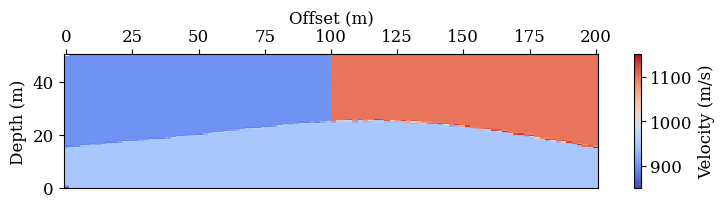

In [4]:
## This script reads the binary files generated by the SPECFEM2D code and plots the model
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt

custom_type = 'f'

init_path = pathlib.Path('output/MODEL_TRUE')
x_bins = sorted(init_path.glob('proc*_x.bin'))
z_bins = sorted(init_path.glob('proc*_z.bin'))
vp_bins = sorted(init_path.glob('proc*_vp.bin'))
vs_bins = sorted(init_path.glob('proc*_vs.bin'))
x_list, z_list, vp_list, vs_list = [], [], [], []
for x_bin, z_bin, vp_bin, vs_bin in zip(x_bins,z_bins, vp_bins, vs_bins):
    x = np.fromfile(x_bin,dtype=custom_type)
    z = np.fromfile(z_bin,dtype=custom_type)
    vp = np.fromfile(vp_bin,dtype=custom_type)
    vs = np.fromfile(vs_bin,dtype=custom_type)
    x_list.append(x)
    z_list.append(z)
    vp_list.append(vp)
    vs_list.append(vs)
x = np.hstack(x_list)
z = np.hstack(z_list)
vp_true = np.hstack(vp_list)
vs_true = np.hstack(vs_list)

imshow_model(x, z, vs_true, cmap='coolwarm', vmin=850, vmax=1150)

<AxesSubplot: xlabel='Offset (m)', ylabel='Depth (m)'>

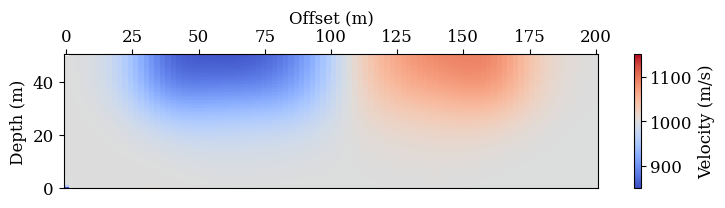

In [11]:
## This script reads the binary files generated by the SPECFEM2D code and plots the model
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt

custom_type = 'f'

init_path = pathlib.Path('output/MODEL_INIT/')
vp_bins = sorted(init_path.glob('proc*_vp.bin'))
vs_bins = sorted(init_path.glob('proc*_vs.bin'))
x_list, z_list, vp_list, vs_list = [], [], [], []
for vp_bin, vs_bin in zip(vp_bins, vs_bins):
    vp = np.fromfile(vp_bin,dtype=custom_type)
    vs = np.fromfile(vs_bin,dtype=custom_type)
    vp_list.append(vp)
    vs_list.append(vs)
vp_init = np.hstack(vp_list)
vs_init = np.hstack(vs_list)

imshow_model(x, z, vs_init, cmap='coolwarm', vmin=850, vmax=1150)

<AxesSubplot: xlabel='Offset (m)', ylabel='Depth (m)'>

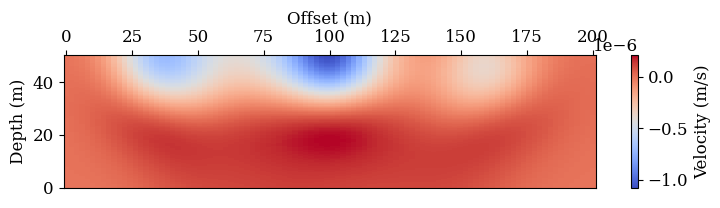

In [15]:
i = 2
bins_path = pathlib.Path(f'output/GRADIENT_{i:02d}')
vp_bins = sorted(bins_path.glob('proc*_vp_kernel.bin'))
vs_bins = sorted(bins_path.glob('proc*_vs_kernel.bin'))
rho_list, vp_list, vs_list = [], [], []
for vp_bin, vs_bin in zip(vp_bins, vs_bins):
    vp = np.fromfile(vp_bin,dtype=custom_type)
    vs = np.fromfile(vs_bin,dtype=custom_type)
    vp_list.append(vp)
    vs_list.append(vs)
vp_kernel = np.hstack(vp_list)
vs_kernel = np.hstack(vs_list)

imshow_model(x, z, vs_kernel, cmap='coolwarm')

<AxesSubplot: xlabel='Offset (m)', ylabel='Depth (m)'>

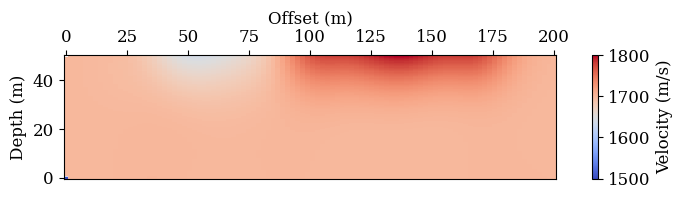

In [13]:
j = 1
bins_path = pathlib.Path(f'output/MODEL_{j:02d}')
vp_bins = sorted(bins_path.glob('proc*_vp.bin'))
vs_bins = sorted(bins_path.glob('proc*_vs.bin'))
rho_list, vp_list, vs_list = [], [], []
for vp_bin, vs_bin in zip(vp_bins, vs_bins):
    vp = np.fromfile(vp_bin,dtype=custom_type)
    vs = np.fromfile(vs_bin,dtype=custom_type)
    vp_list.append(vp)
    vs_list.append(vs)
vp = np.hstack(vp_list)
vs = np.hstack(vs_list)

# imshow_model(x, z, vs, cmap='coolwarm', vmin=850, vmax=1150)
imshow_model(x, z, vp, cmap='coolwarm', vmin=1500, vmax=1800)

<AxesSubplot: xlabel='Offset (m)', ylabel='Depth (m)'>

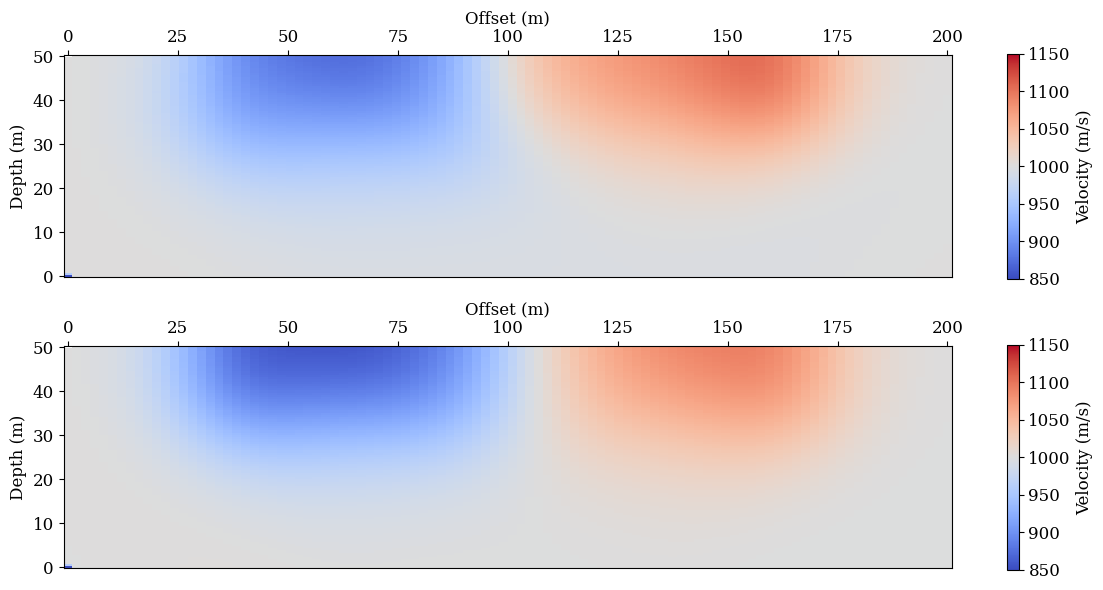

In [14]:
j = 1
bins_path = pathlib.Path(f'output/MODEL_{j:02d}')
vp_bins = sorted(bins_path.glob('proc*_vp.bin'))
vs_bins = sorted(bins_path.glob('proc*_vs.bin'))
rho_list, vp_list, vs_list = [], [], []
for vp_bin, vs_bin in zip(vp_bins, vs_bins):
    vp = np.fromfile(vp_bin,dtype=custom_type)
    vs = np.fromfile(vs_bin,dtype=custom_type)
    vp_list.append(vp)
    vs_list.append(vs)
vp = np.hstack(vp_list)
vs = np.hstack(vs_list)

fig, axes = plt.subplots(2, 1, figsize=(12, 6))
imshow_model(x, z, vs, cmap='coolwarm', vmin=850, vmax=1150, ax=axes[0], fig=fig)
imshow_model(x, z, vs_init, cmap='coolwarm', vmin=850, vmax=1150, ax=axes[1], fig=fig)

# imshow_model(x, z, vp, cmap='coolwarm', vmin=1500, vmax=1800)

## Make New Model

In [ ]:

# from scipy.interpolate import interp1d

# new_xx = np.linspace(x.min(), x.max(), 201)
# new_zz = np.linspace(z.min(), z.max(), 101)
# X, Z = np.meshgrid(new_xx, new_zz)

# dd = np.array([
#             [-50, 50],
#             [0, 50],
#             [25, 50],
#             [50, 50],
#             [100, 75],
#             [150, 100],
#             [200, 60],
#             [250, 100],
#             [300, 70],
#             [350, 50],
#             [400, 50],
#             [500, 50],
#             [600, 50]])

# # 创建插值函数
# # linear: 线性插值; nearest: 最近邻插值; cubic: 三次样条插值; quadratic: 二次插值
# f = interp1d(dd[:, 0], dd[:, 1], kind='quadratic')  
# y_fit = f(new_xx)

# new_vp = np.empty_like(X)
# for i in range(new_vp.shape[1]):
#     for j in range(new_vp.shape[0]):
#         if new_zz[j] > y_fit[i]:
#             new_vp[j,i] = 350*2
#         else:
#             new_vp[j,i] = 400*2

# new_vs = np.empty_like(X)
# for i in range(new_vs.shape[1]):
#     for j in range(new_vs.shape[0]):
#         if new_zz[j] > y_fit[i]:
#             new_vs[j,i] = 350
#         else:
#             new_vs[j,i] = 400


# # 将数据转换为XYZ格式
# x_flat = X.flatten()
# z_flat = Z.flatten()
# vp_flat = new_vp.flatten()
# vs_flat = new_vs.flatten()



In [ ]:
# plot_model(x_flat, z_flat, vs_flat)

## To Save Model

In [ ]:
# from scipy.interpolate import griddata

# import os
# import numpy as np
# import pathlib
# import re
# from seisflows.tools import specfem

# nproc = int(specfem.getpar(key='NPROC', file='./specfem2d_workdir/DATA/Par_file')[1])
# nstep = int(specfem.getpar(key='NSTEP', file='./specfem2d_workdir/DATA/Par_file')[1])
# dt = float(specfem.getpar(key='DT', file='./specfem2d_workdir/DATA/Par_file')[1])
# nrec = int(specfem.getpar(key='nrec', file='./specfem2d_workdir/DATA/Par_file')[1])
# xdeb = float(specfem.getpar(key='xdeb', file='./specfem2d_workdir/DATA/Par_file')[1])
# xfin = float(specfem.getpar(key='xfin', file='./specfem2d_workdir/DATA/Par_file')[1])
# dx = (xfin - xdeb) / (nrec - 1)


# for i in range(nproc):
#     VP = griddata(np.vstack((x_flat, z_flat)).T,  # 旧坐标
#                 vp_flat,                      # 旧坐标对应的值
#                 (x_list[i], z_list[i]),    # 新坐标
#                 method='cubic')
#     VS = griddata(np.vstack((x_flat, z_flat)).T,  # 旧坐标
#                 vs_flat,                      # 旧坐标对应的值
#                 (x_list[i], z_list[i]),    # 新坐标
#                 method='cubic')

#     np.savetxt(f'./specfem2d_workdir/DATA/proc{i:06d}_rho_vp_vs.dat',
#                np.vstack((x_list[i], z_list[i], rho_list[i], VP, VS)).T,
#                fmt='%.6f')


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
# plt.rcParams['font.size'] = 12

# size_x = x.max() - x.min()
# size_z = z.max() - z.min()
# scale = 8.0
# figsize = (scale, scale*size_z/size_x) if size_x > size_z else (scale*size_x/size_z, scale)
# fig, ax = plt.subplots(1, 1, figsize=figsize)

# im = ax.tripcolor(x, z, vs, cmap='jet')
# im = ax.tripcolor(x_list[i], z_list[i], VS, cmap='jet')
# ax.set_xlabel('Offset (m)')
# ax.set_ylabel('Depth (m)')
# ax.xaxis.tick_top()
# ax.xaxis.set_label_position('top')  # 将x轴的标签也移动到顶部
# ax.set_aspect('equal')
# ax = plt.gca()                      #获取到当前坐标轴信息
# ax.xaxis.set_ticks_position('top')  #将X坐标轴移到上面
# ax.invert_yaxis()                   #反转Y坐标轴

# fig.colorbar(im, ax=ax, orientation='vertical', label='Velocity (m/s)')
# fig.tight_layout()




In [ ]:
# Gmesh

# python LibGmsh2Specfem.py SqrCirc -t A -b A -r A -l A

In [ ]:
# specfem2d GPU

# ./configure FC=gfortran CC=gcc MPIFC=mpif90 CUDA_INC=/usr/bin CUDA_LIB=/usr/bin --with-mpi --with-cuda

## 避坑： GPU编译的，seisflows用的时候不行